In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

<h2>Kaggle Bike Sharing Demand Dataset</h2>

Modified 'count' to log1p(count) for training

Log can be used when target represents a count (that is non-negative values)

Model now predicts as log1p(count). We need to convert it back to actual count using expm1(predicted_target)

Input Features: ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek','hour']<br>
Target Feature: [<b>log1p('count')</b>]<br>

In [5]:
# Converts to log1p(count)
# Returns orginal count back with expm1

print('Test log and exp')
test_count = 100
print('original count',test_count)
x = np.log1p(test_count)
print('log1p value of {0} is {1}'.format(test_count,x))
print('exmp1 returns original value',np.expm1(x))

Test log and exp
original count 100
log1p value of 100 is 4.61512051684126
exmp1 returns original value 100.00000000000003


In [6]:
columns = ['count', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek','hour']

In [22]:
df = pd.read_csv('train.csv',parse_dates=['datetime'], index_col=0)
df_test = pd.read_csv('test.csv',parse_dates=['datetime'], index_col=0)

In [23]:
# Convert datetime to numeric by spliting

def add_features(df):
    df['year']=df.index.year
    df['month']=df.index.month
    df['day']=df.index.day
    df['dayofweek']=df.index.dayofweek
    df['hour']=df.index.hour

In [24]:
add_features(df)
add_features(df_test)

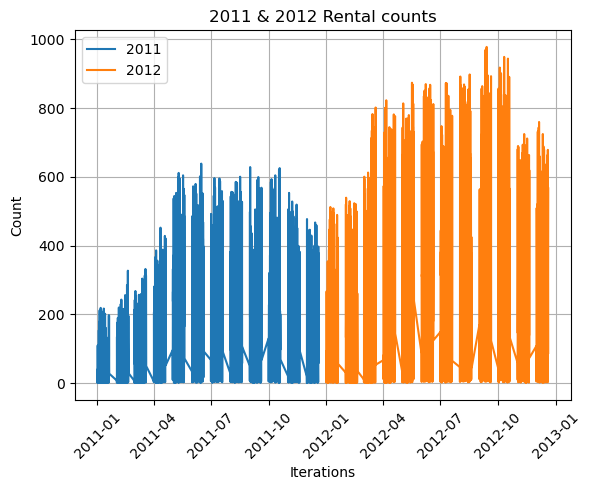

In [12]:
plt.plot(df.loc['2011']['count'], label='2011')
plt.plot(df.loc['2012']['count'], label='2012')
plt.xlabel('Iterations')
plt.ylabel('Count')
plt.grid()
plt.legend()
plt.xticks(fontsize=10,rotation=45)
plt.title('2011 & 2012 Rental counts')
plt.show()

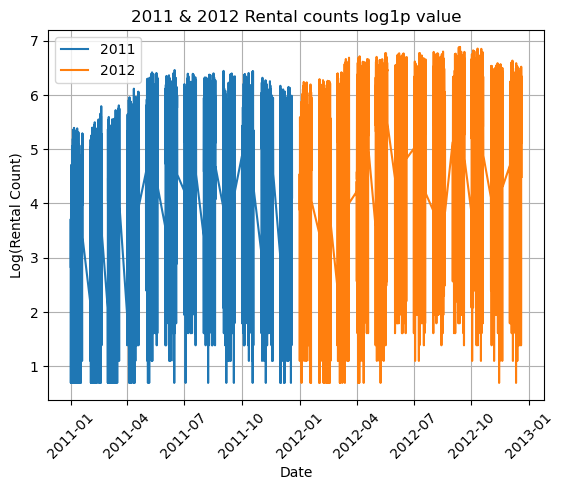

In [14]:
plt.plot(df.loc['2011']['count'].map(np.log1p),label='2011')
plt.plot(df.loc['2012']['count'].map(np.log1p),label='2012')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Log(Rental Count)')
plt.xticks(fontsize=10, rotation=45)
plt.title('2011 & 2012 Rental counts log1p value')
plt.legend()
plt.show()

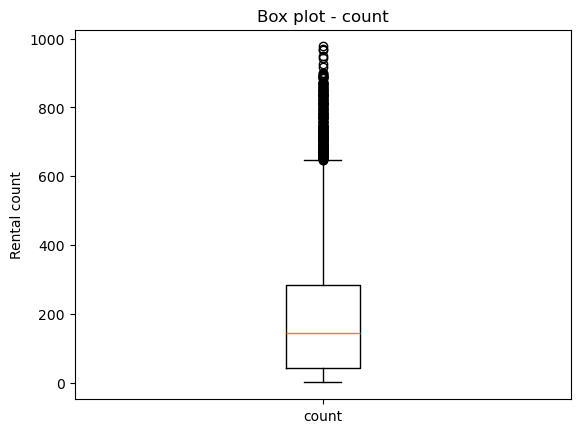

In [16]:
# box plot to see outliers in Rental count

plt.boxplot(df['count'], labels=['count'])
plt.ylabel('Rental count')
plt.title('Box plot - count')
plt.show()

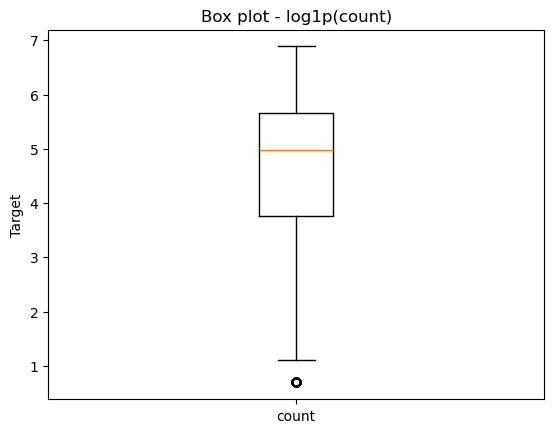

In [17]:
# boxplot log1p(count) to see outliers

plt.boxplot(df['count'].map(np.log1p), labels=['count'])
plt.ylabel('Target')
plt.title('Box plot - log1p(count)')
plt.show()

In [25]:
df['count'] = df['count'].map(np.log1p)

In [26]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2.833213,2011,1,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,3.713572,2011,1,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,3.496508,2011,1,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2.639057,2011,1,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,0.693147,2011,1,1,5,4


In [27]:
df_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [21]:
add_features(df_test)

In [28]:
df.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count         float64
year            int64
month           int64
day             int64
dayofweek       int64
hour            int64
dtype: object

In [29]:
df.to_csv('bike_all_rev3.csv',index=True, index_label='datetime',columns = columns)

In [30]:
### Training and Test data split

np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.loc[l]

In [31]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,,,,
2011-09-03 00:00:00,3,0,0,2,26.24,30.305,73,7.0015,22,65,4.477337,2011,9,3,5,0
2012-08-13 14:00:00,3,0,1,1,32.80,34.850,33,7.0015,85,163,5.517453,2012,8,13,0,14
2011-11-05 17:00:00,4,0,0,1,15.58,19.695,40,11.0014,100,234,5.814131,2011,11,5,5,17
2012-08-09 19:00:00,3,0,1,1,32.80,37.880,55,12.9980,90,533,6.436150,2012,8,9,3,19
2011-04-14 06:00:00,2,0,1,1,13.94,17.425,76,7.0015,4,66,4.262680,2011,4,14,3,6


In [34]:
# calculating test, train split rows

rows = df.shape[0]
train = int(rows * 0.7)
test = rows - train

In [35]:
rows, train, test

(10886, 7620, 3266)

In [36]:
columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour']

In [40]:
# Writing Training set

df.iloc[:train].to_csv('bike_train_rev3.csv',index=False, header=False, columns=columns)

In [41]:
# Writing Test dataset

df.iloc[train:].to_csv('bike_validation_rev3.csv',index=False, header=False, columns=columns)

In [43]:
# Test Data has only input features
df_test.to_csv('bike_test_rev3.csv',index=True, index_label='datetime')

In [44]:
print(','.join(columns))

count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour


In [46]:
with open('bike_train_columns_list_rev3.txt','w') as f:
    f.write(','.join(columns))